#  Efficient Frontier 
-  หาสัดส่วนการลงทุนเมื่อเปรียบเทียบความเสี่ยงที่เหมาะสมที่สุด (Efficient Frontier ของ Markowitz)

In [1]:
import sys
import os
from IPython.display import display, HTML 
%config InlineBackend.figure_format='retina'

# กำหนด path ไปยังโฟลเดอร์ 'libs' ที่อยู่ข้างนอกของ 'subfolder'
# ใช้ os.path.abspath สำหรับการรับ absolute path
libs_path = os.path.abspath(os.path.join(os.getcwd(), '..', ''))

# ใส่ path นี้ไปที่ตำแหน่งแรกใน sys.path เพื่อให้ Python ค้นหาที่นี่ก่อน
if libs_path not in sys.path:
    sys.path.insert(0, libs_path)

import starfishXapi as sx
from starfishXapi.set_api import fnType
sx.enable_autoreload()
print(sx.__version__)

Autoreload enabled.
0.00103


In [2]:
def display_image(img):
    display(HTML(f'<div style="text-align: left;"><img src="../_static/{img}.png" style="height:100px;"></div>'))

In [3]:
# สร้าง object dataReader
dataReader = sx.HistStockPrice()
# dataReader.openLog(directory='cache/') # สร้าง folder cache/

*you are using nologin method, data you access may be limited


In [582]:
import pandas as pd
import numpy as np
start_date = '2024-01-01'
stop_date = '2024-09-13'  

asset1 = 'dusit'
asset2 = 'delta'

df1 = dataReader.getPrice(symbol=asset1,start=start_date,stop=stop_date) 
df2 = dataReader.getPrice(symbol=asset2,start=start_date,stop=stop_date) 

df = pd.concat([df1['close'],df2['close']],axis=1)
df.columns = [asset1,asset2]

In [583]:
df.head(3)

dusit  delta
Date                    
2024-01-02    8.8  91.25
2024-01-03    8.8  90.00
2024-01-04    8.8  87.00

In [586]:
df.tail(3)

dusit  delta
Date                    
2024-09-11   11.2  101.5
2024-09-12   11.3  104.0
2024-09-13   11.2  103.5

In [588]:
# คำนวนจาก return 
return_asset1 = 'return_'+asset1
return_asset2 = 'return_'+asset2
df[return_asset1] = df[asset1].pct_change()
df[return_asset2] = df[asset2].pct_change()

In [590]:
c = df[[return_asset1,return_asset2]].cov()
cov_Port = c[return_asset1][return_asset2]
cov_Port

4.27751351193159e-05

In [592]:
std_asset1 = df[return_asset1].std()
std_asset2 = df[return_asset2].std()
print(std_asset1,std_asset2)

0.021900903108050523 0.025080231154377946


In [594]:
covPort = np.cov(df1['close'].pct_change().dropna(), df2['close'].pct_change().dropna())[0,1]
covPort

4.277513511931594e-05

In [596]:
#r1 = (df1['close'].iloc[-1] / df1['close'].iloc[0])-1
#r2 = (df2['close'].iloc[-1] / df2['close'].iloc[0])-1
#print(r1,r2)
r1 = (np.log(df1['close'] / df1['close'].shift(1))).mean()
r2 = (np.log(df2['close'] / df2['close'].shift(1))).mean()
print(r1,r2)

0.0014103044258297493 0.0007366585979112454


In [610]:
# การคำนวณ

In [708]:
# หาผลตอบแทนของพอร์ตโฟลิโอ
display_image('return_port')

In [710]:
# หาความเสี่ยงของพอร์ตโฟลิโอ
display_image('std_port')

Text(0, 0.5, 'Returns')

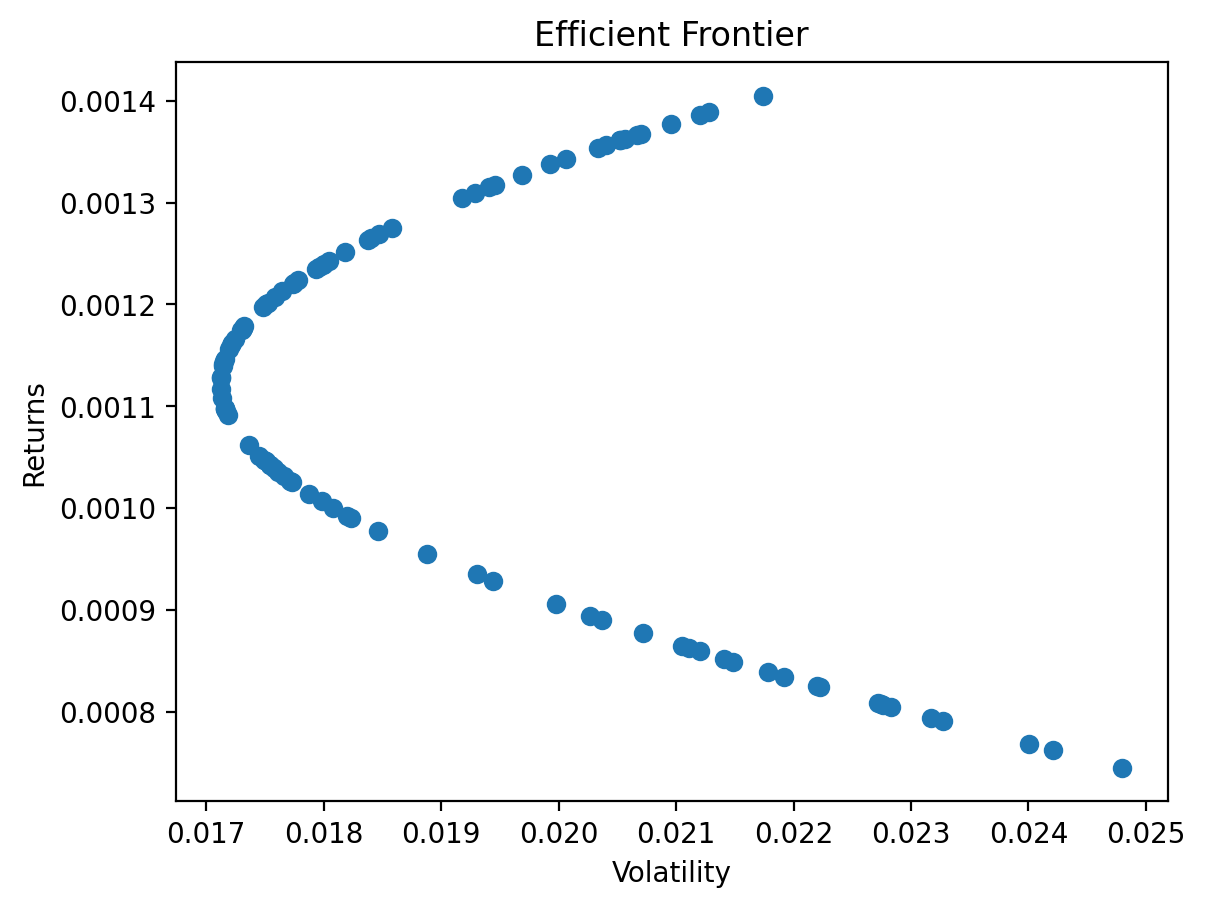

In [598]:
import random
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'

wX,wY,std_port,return_port = [],[],[],[]
for i in range(100):
  weights1 = random.randint(0,1000)/1000
  weights2 = 1-weights1
 
  s = ((weights1**2)*(std_asset1**2)) + ((weights2**2)*(std_asset2**2)) + ((2*weights1*weights2*covPort))
  std_port.append(s**0.5)
  wX.append(weights1)
  wY.append(weights2)  
  k = weights1*r1 + weights2*r2
  return_port.append(k)  

# plot
plt.scatter(std_port,return_port)
plt.title('Efficient Frontier')
plt.xlabel('Volatility')
plt.ylabel('Returns')

In [600]:
# หาจุดที่มีน้ำหนักในการลงทุนที่เหมาะสมที่สุด
pt = np.argmax(np.array(return_port)/np.array(std_port))
pt

89

In [602]:
std_port[pt] , return_port[pt]

(0.01799235352004388, 0.0012391983855384494)

สัดส่วนการลงทุน dusit:74.6% , delta:25.4%


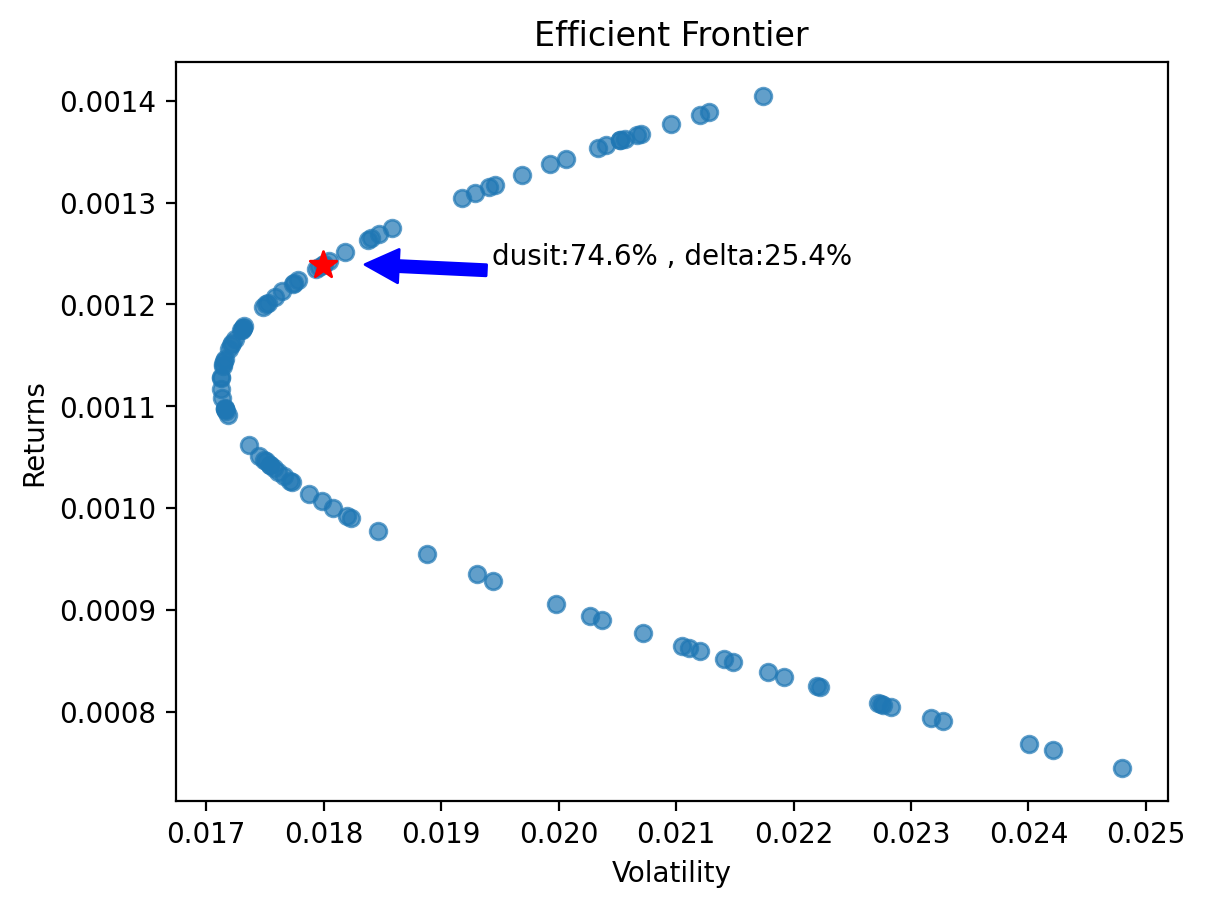

In [608]:
# plot
plt.scatter(std_port,return_port,alpha=0.7)
plt.scatter(std_port[pt],return_port[pt],c='red',s=100,marker='*')
plt.title('Efficient Frontier')
plt.xlabel('Volatility')
plt.ylabel('Returns')

report = f'{asset1}:{round(wX[pt]*100,2)}% , {asset2}:{round(wY[pt]*100,2)}%'
plt.annotate(
# Label and coordinate
report, xy=(std_port[pt]*1.02, return_port[pt]), xytext=(std_port[pt]*1.08, return_port[pt]),
# Custom arrow arrowstyle: '<|-|>'
arrowprops=dict(color='blue'))

# Portfolio Optimization 
print('สัดส่วนการลงทุน '+report)

## Portfolio Optimization N Asset

In [957]:
# ตัวอย่างการจำลอง ข้อมูล
S0 = 50  # ราคาหุ้นเริ่มต้น
mu = 0.05  # ค่า drift (0% ต่อปี)
sigma = 0.04  # ความผันผวน (4% ต่อปี)
T = 2.0  # จำลอง 1 ปี (252 วันทำการ)
dt = 1/252  # เวลาย่อย 1 วัน
N = int(T / dt)  # จำนวนก้าว


# เรียกใช้ฟังก์ชัน
stock_prices1, time_steps = sx.generate_gbm_price(S0, mu*1.1, sigma, T, dt, N)
stock_prices2, time_steps = sx.generate_gbm_price(S0*2, mu, sigma*1.1, T, dt, N)
stock_prices3, time_steps = sx.generate_gbm_price(S0/2, mu*1.2, sigma*1.2, T, dt, N)
stock_prices4, time_steps = sx.generate_gbm_price(S0*0.7, mu*0.9, sigma*0.9, T, dt, N)
stock_prices5, time_steps = sx.generate_gbm_price(S0*3, mu, sigma*1.2, T, dt, N)

basket = ['asset1','asset2','asset3','asset4','asset5']

dates = pd.date_range(start="2020-01-01", periods=N)
# สร้าง DataFrame เพื่อแสดงข้อมูล
df1 = pd.DataFrame({'Date': dates,'close': stock_prices1})
df2 = pd.DataFrame({'Date': dates,'close': stock_prices2})
df3 = pd.DataFrame({'Date': dates,'close': stock_prices3})
df4 = pd.DataFrame({'Date': dates,'close': stock_prices4})
df5 = pd.DataFrame({'Date': dates,'close': stock_prices5})

df = pd.concat([df1['close'],df2['close'],df3['close'],df4['close'],df5['close']],axis=1)
df.columns = basket
df['Date'] = dates
df = df.set_index('Date')
df

asset1      asset2     asset3     asset4      asset5
Date                                                               
2020-01-01  49.900687  100.059937  24.959906  35.110059  150.336650
2020-01-02  49.838575   99.759540  24.996851  35.125864  149.852368
2020-01-03  49.625871   99.649295  25.053883  35.146889  150.052292
2020-01-04  49.681100   99.491422  25.117299  35.149583  149.891886
2020-01-05  49.472878   99.696049  25.075191  35.366835  150.831060
...               ...         ...        ...        ...         ...
2021-05-14  53.557889  118.775801  30.496565  38.471485  167.000924
2021-05-15  53.524382  118.011936  30.447528  38.464204  167.786086
2021-05-16  53.304201  117.701526  30.483837  38.366441  167.383475
2021-05-17  53.347583  118.687367  30.503559  38.434985  166.479697
2021-05-18  53.398578  118.443979  30.523773  38.430162  167.072123

[504 rows x 5 columns]

In [959]:
# คำนวณผลตอบแทนรายวัน (Daily Returns)

for i in basket:
  df[i] = df[i].pct_change()

df = df.dropna()
df

asset1    asset2    asset3    asset4    asset5
Date                                                        
2020-01-02 -0.001245 -0.003002  0.001480  0.000450 -0.003221
2020-01-03 -0.004268 -0.001105  0.002282  0.000599  0.001334
2020-01-04  0.001113 -0.001584  0.002531  0.000077 -0.001069
2020-01-05 -0.004191  0.002057 -0.001676  0.006181  0.006266
2020-01-06 -0.001111  0.001978  0.004524  0.002164  0.004885
...              ...       ...       ...       ...       ...
2021-05-14  0.002253 -0.000358 -0.003285  0.000888 -0.003113
2021-05-15 -0.000626 -0.006431 -0.001608 -0.000189  0.004702
2021-05-16 -0.004114 -0.002630  0.001193 -0.002542 -0.002400
2021-05-17  0.000814  0.008376  0.000647  0.001787 -0.005399
2021-05-18  0.000956 -0.002051  0.000663 -0.000125  0.003559

[503 rows x 5 columns]

In [961]:
cov_matrix = df.cov()
cov_matrix

asset1        asset2        asset3        asset4        asset5
asset1  6.102688e-06 -3.100579e-07 -2.709476e-07 -5.100542e-08 -3.400877e-07
asset2 -3.100579e-07  8.015051e-06  1.355729e-09  3.097635e-07  6.351782e-08
asset3 -2.709476e-07  1.355729e-09  8.818117e-06 -2.264317e-07 -1.486706e-07
asset4 -5.100542e-08  3.097635e-07 -2.264317e-07  5.397896e-06  3.030147e-07
asset5 -3.400877e-07  6.351782e-08 -1.486706e-07  3.030147e-07  9.483994e-06

In [962]:
return_ =  df.mean()
return_

asset1    0.000138
asset2    0.000339
asset3    0.000405
asset4    0.000182
asset5    0.000215
dtype: float64

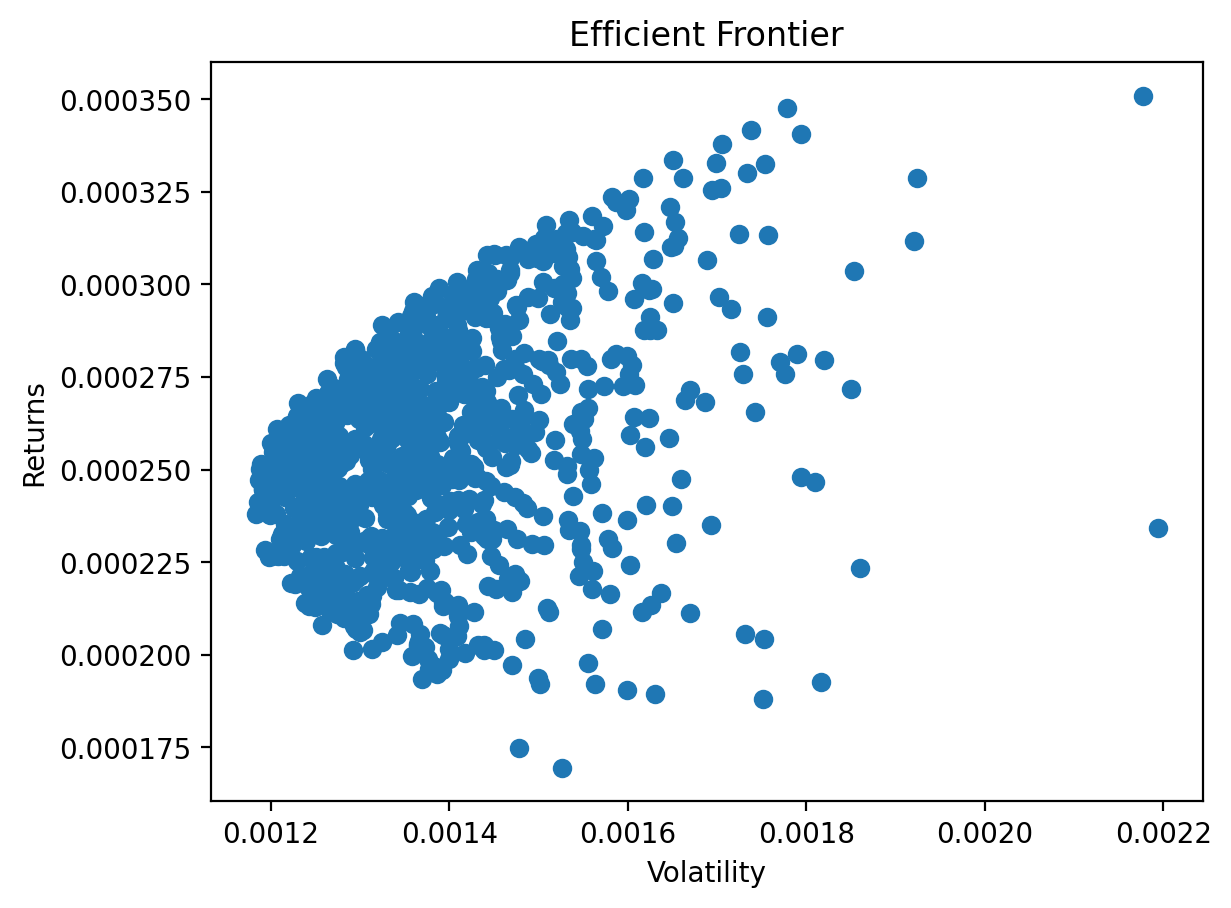

In [965]:
w_port,std_port,return_port = [],[],[]

num_assets = len(basket) 

for i in range(1000):
  weights = np.random.random(num_assets)
  weights /= np.sum(weights)
 
  s = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
  std_port.append(s)

  w_port.append(weights)
    
  k = np.dot(weights, return_)
  return_port.append(k)  

# plot
plt.scatter(std_port,return_port)
plt.title('Efficient Frontier')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.show()

In [966]:
# หาจุดที่มีน้ำหนักในการลงทุนที่เหมาะสมที่สุด
pt = np.argmax(np.array(return_port)/np.array(std_port))
pt

297

In [973]:
# plot
plt.scatter(std_port,return_port,alpha=0.7)
plt.scatter(std_port[pt],return_port[pt],c='red',s=200,marker='*',alpha=0.7)
plt.title('Efficient Frontier')
plt.xlabel('Volatility')
plt.ylabel('Returns')

print('สัดส่วนการลงทุน ',w_port[pt])

สัดส่วนการลงทุน  [0.16897566 0.25983598 0.26810587 0.14320509 0.15987741]
